In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
sim_start_date_time = "2024_01_05__04_34_21"
sim_metrics_file_name =  "Simulation_start_at_{date_time}__species_count_over_time.csv".format(date_time=sim_start_date_time)

In [24]:
# Define species to be excluded from the plot
exclude_species = ['Plant']

# Define line styles for each species (color and width)
species_styles = {
    'Plant': {'color': 'green', 'linewidth': 2},
    'Rabbit': {'color': 'blue', 'linewidth': 2}
}

In [25]:
# Read the CSV file
df = pd.read_csv('./csv/{file_name}'.format(file_name=sim_metrics_file_name))

In [26]:
# Get unique species in the dataset excluding the specified ones
species_list = [species for species in df['Species'].unique() if species not in exclude_species]


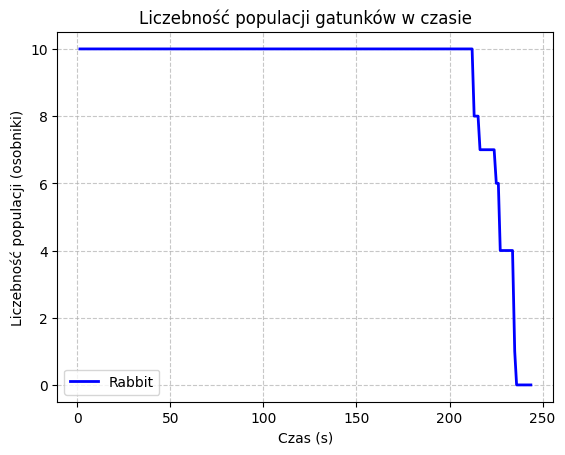

In [27]:
# Plotting the line chart
graph_size = (12, 8)  # Adjust as needed for resolution

# Separate data for each species
for species in species_list:
    species_data = df[df['Species'] == species]
    # Get line style for the species
    style = species_styles.get(species, {'color': 'black', 'linewidth': 1})
    plt.plot(species_data['Time'], species_data['Count'], label=species, 
             color=style['color'], linewidth=style['linewidth'])

# Style graph

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)
# Adding labels and title
plt.xlabel('Czas (s)')
plt.ylabel('Liczebność populacji (osobniki)')
plt.title('Liczebność populacji gatunków w czasie')
# Adding legend
plt.legend()

In [28]:
# Save the plot
plt.savefig('./graphs/population_change_over_time.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>